# Problem statement

Halloween is a night of costumes, fun, and candy that takes place every year on October 31. On this day people dress up 
 in various costumes that have a scary overtone and go trick-or-treating to gather candy.
    
This year, on Halloween, there is a carnival in your neighborhood. Besides the various games, there are also 50 stalls that 
are selling various products, which fall under various categories.

Our task is to predict the selling price of the products based on the provided features.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
train_csv = pd.read_csv(r"D:\D-DATA\data\train.csv")                       #    !!  1 Dataset

In [3]:
train_csv.shape

(6368, 15)

In [4]:
train_csv.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
test_csv  = pd.read_csv(r"D:\D-DATA\data\test.csv")                         ##  !!  2 Dataset

In [6]:
test_csv.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [7]:
test_csv.shape

(3430, 14)

In [8]:
sample_submission = pd.read_csv(r"D:\D-DATA\data\sample_submission.csv")    ##    !!   3 Dataset

In [9]:
sample_submission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [10]:
sample_submission.shape

(5, 2)

In [11]:
data = train_csv.append(test_csv)                                #  !!   Our final data

C:\Users\dell\AppData\Local\Temp\ipykernel_15476\2150378028.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train_csv.append(test_csv)                                #  !!   Our final data


In [12]:
data = pd.merge(train_csv,sample_submission,on='Selling_Price',how='left')

In [13]:
data.head()

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,NaN
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,NaN
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,NaN
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,NaN
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,NaN


In [14]:
print(data.shape)

(6368, 16)


In [15]:
print(data.describe()) #  Its only for Numerical data   ##  include = 'all'

          Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  6363.000000      6368.000000  6368.000000  6368.000000     6330.000000   
mean     25.309445       199.340609     0.643687    50.921168        0.140442   
std      14.328980       170.275570     1.025092    29.091922        0.347473   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      25.000000       132.000000     0.000000    51.000000        0.000000   
75%      37.000000       403.000000     2.000000    76.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1  charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  
count  6170.000000    6163.000000    6330.000000    6025.000000    6327.000000  
mean    264.514100      10.146195    3531.349763    6432.545892    4563.242592  
std     124.483056       4.

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 6367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id_x      6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
 15  Product_id_y      0 non-null      object 
dtypes: float64(7), int64(3), object(6)
memory 

In [17]:
print(data.dtypes)

Product_id_x         object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
Product_id_y         object
dtype: object


In [18]:
print(data.isnull().sum())

Product_id_x           0
Stall_no               5
instock_date           0
Market_Category        0
Customer_name        211
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        38
charges_1            198
charges_2 (%)        205
Minimum_price         38
Maximum_price        343
Selling_Price         41
Product_id_y        6368
dtype: int64


In [19]:
data[data['Discount_avail'].isnull()]

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
64,NKCECW7BSTZBHH6R,2.0,2015-09-24 17:26:11.000,268,Tyrus,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,NaN,NaN
128,SHIEHXZEWWACSXRQ,26.0,2015-11-12 15:20:20.000,62,Kaizen,Yes,Child_care,0,70,NaN,290.0,7.0,2895.0,12275.0,7801.506900,NaN
275,SCFEHFMHWZNYMH9C,45.0,2015-05-05 15:10:20.000,73,Amir,No,Repair,0,87,NaN,208.0,8.0,1133.0,1608.0,233.528064,NaN
398,CRTECN2QUCD97JY3,25.0,2015-09-23 14:31:58.000,65,Jan,Yes,Educational,0,73,NaN,139.0,16.0,1245.0,2872.0,2178.782100,NaN
470,SHIE9WHT4M9FHMB5,24.0,2015-05-05 16:10:27.000,235,Elliot,Yes,Home_decor,2,2,NaN,297.0,15.0,3132.0,6194.0,744.973995,NaN
812,PTPE3KKX3DBHYFVX,24.0,2015-10-21 00:09:55.000,3,Azari,No,Repair,0,85,NaN,223.0,9.0,3098.0,4153.0,569.444198,NaN
822,WATEHYMDBDZAYJ4E,25.0,2015-11-10 16:09:21.000,471,Jalisa,Yes,Home_decor,2,25,NaN,290.0,14.0,2183.0,4942.0,577.176941,NaN
888,JEAECN2PWUKFA9GJ,23.0,2014-12-06 15:25:52.000,460,Hudson,No,Home_decor,3,82,NaN,213.0,17.0,252.0,NaN,539.684992,NaN
1162,BRAE8EHTZYYGGETT,13.0,2015-08-20 21:31:51.000,423,Tania,No,Hospitality,0,52,NaN,319.0,9.0,1546.0,5653.0,3896.640864,NaN
1280,NKCE3Y6E4VQWEHZS,33.0,2015-09-26 13:18:31.000,205,Marigold,No,Child_care,0,61,NaN,342.0,17.0,2121.0,3310.0,3031.498800,NaN


In [20]:
data['Discount_avail'].mean()

0.14044233807266981

In [21]:
data['Discount_avail'].mode()

0    0.0
Name: Discount_avail, dtype: float64

In [22]:
##  We are filling ['Discount_avail'] column by 0

In [23]:
data['Discount_avail'].fillna(0.0,inplace=True)

In [24]:
data[data['charges_1'].isnull()]

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,NaN,11.0,786.0,NaN,2582.860500,NaN
33,BRAE8TFHWYCTDUM3,17.0,2015-08-19 21:08:45.000,101,Roslyn,No,Repair,0,19,0.0,NaN,9.0,950.0,1580.0,1563.983586,NaN
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Linda,Yes,Cosmetics,3,31,0.0,NaN,NaN,9483.0,13644.0,11761.213275,NaN
106,MUGEACY8DDVJ8QAD,30.0,2015-09-22 17:22:59.000,451,Maximillian,Yes,Fashion,0,53,0.0,NaN,17.0,4627.0,NaN,5512.304016,NaN
182,PBXEAREZRNRE8BBY,39.0,2015-11-20 05:56:33.000,70,Jacion,No,Fashion,2,98,0.0,NaN,16.0,3225.0,5287.0,4592.708736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,KTAEHE9KNNU7RP4Z,12.0,2014-11-04 13:30:23.000,13,Levi,Yes,Hospitality,3,44,0.0,NaN,10.0,341.0,2196.0,1473.280272,NaN
6216,PBXE5SJHVBDY7PHS,5.0,2015-11-17 18:29:51.000,451,Liesl,No,Technology,0,85,0.0,NaN,10.0,5647.0,7671.0,7021.079296,NaN
6243,SHIE3QDH6Z4KU5TY,6.0,2015-08-23 19:36:12.000,146,NaN,No,Hospitality,2,4,0.0,NaN,13.0,1669.0,2557.0,2356.514325,NaN
6246,PACEBEW6FSE32PDY,31.0,2015-09-24 15:24:14.000,91,Mayla,No,Cosmetics,0,9,0.0,NaN,17.0,1782.0,4000.0,3147.595209,NaN


In [25]:
data['charges_1'].mean()

264.51410048622364

In [26]:
data['charges_1'].fillna(264,inplace=True)       ###  Filled by mean

In [27]:
data[data['charges_2 (%)'].isnull()]

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Linda,Yes,Cosmetics,3,31,0.0,264.0,NaN,9483.0,13644.0,11761.213275,NaN
84,BRAEDSKCPTZTAU8H,50.0,2015-08-21 19:36:19.000,103,Noble,Yes,Child_care,1,17,0.0,328.0,NaN,3790.0,6945.0,5699.759967,NaN
162,BRAE3TSHYZTHHE2F,25.0,2015-08-19 19:08:07.000,452,Ira,Yes,Technology,0,30,0.0,642.0,NaN,6251.0,8802.0,8157.086175,NaN
277,WTCEGGTZEJQ2YRQG,36.0,2015-05-08 16:03:25.000,443,Frances,Yes,Home_decor,0,17,0.0,289.0,NaN,4651.0,6468.0,5856.814260,NaN
285,NKCEAX7H9SH5UZNS,12.0,2015-11-18 06:56:37.000,108,Edan,No,Fashion,0,47,0.0,387.0,NaN,2457.0,5460.0,4323.193344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,BRAECKHYZGUPRPFB,1.0,2015-08-19 21:25:15.000,7,Greysen,No,Organic,0,25,0.0,106.0,NaN,384.0,1749.0,1170.526350,NaN
6290,PLLEHQWA23AWQQJH,29.0,2015-08-23 18:36:42.000,128,Christian,Yes,Repair,0,79,0.0,282.0,NaN,924.0,2305.0,1878.812100,NaN
6304,CRTECN2QXGFANZMN,28.0,2015-09-25 15:30:05.000,55,Jamiah,Yes,Fashion,0,65,0.0,357.0,NaN,2592.0,3588.0,3417.420600,NaN
6331,BRAEDNX2NKMJFZ74,46.0,2015-08-19 19:14:10.000,99,Karissa,Yes,Fashion,0,43,0.0,375.0,NaN,579.0,NaN,1716.066432,NaN


In [28]:
data['charges_2 (%)'].mean()

10.146195034885608

In [29]:
data['charges_2 (%)'].fillna(9,inplace=True)         ##  Fillen dy mean

In [30]:
data[data['Minimum_price'].isnull()]

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
107,TROEGJZZFZ4QJBAW,30.0,2015-08-23 20:36:19.000,205,Emmit,Yes,Hospitality,0,9,0.0,259.0,13.0,NaN,3224.0,2939.186052,NaN
127,RNGEAXGWCT4VVTWR,45.0,2015-05-07 15:20:59.000,407,Gunnar,No,Home_decor,0,86,0.0,208.0,11.0,NaN,4378.0,3375.709568,NaN
160,MUGE5HG8G63YKHFB,16.0,2015-09-22 17:28:21.000,146,Eithan,Yes,Repair,2,68,0.0,250.0,5.0,NaN,NaN,2079.920700,NaN
530,MUGEAGGKPVFMRCXU,28.0,2015-09-22 15:31:31.000,451,NaN,No,Child_care,0,6,0.0,252.0,15.0,NaN,6674.0,6019.537986,NaN
785,BRAEBD44CXFHNAHF,44.0,2015-08-22 17:48:23.000,58,Jakari,Yes,Home_decor,0,65,0.0,241.0,16.0,NaN,NaN,5294.183400,NaN
1354,CNSEH4JEFRFBFYZV,8.0,2015-05-20 06:41:36.000,23,Audrina,Yes,Technology,2,15,0.0,476.0,7.0,NaN,4004.0,3417.218244,NaN
1374,BKPEHTGBH5GGWENP,11.0,2015-05-09 15:12:07.000,62,Everleigh,Yes,Fashion,0,4,0.0,380.0,16.0,NaN,12830.0,8331.866730,NaN
1631,BRAECFANXY3DJ4XT,44.0,2015-08-20 19:32:15.000,423,Ida,No,Home_decor,0,5,0.0,260.0,9.0,NaN,7070.0,5607.819162,NaN
1739,BRAE3TSHYZHBYFBU,1.0,2015-08-21 20:32:15.000,358,Destin,Yes,Pet_care,3,25,0.0,119.0,8.0,NaN,8351.0,5960.242050,NaN
1756,ACCEKFVXGGHZ9VES,1.0,2015-05-08 13:20:08.000,268,Dillon,No,Organic,2,64,0.0,129.0,8.0,NaN,4944.0,4454.495100,NaN


In [31]:
data['Minimum_price'].mean()

3531.3497630331753

In [32]:
 data['Minimum_price'].fillna(3050.0,inplace=True)   ##   Filled by mean

In [33]:
data[data['Maximum_price'].isnull()]

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,264.0,11.0,786.0,NaN,2582.860500,NaN
36,NKCE5T3GVHYKZSDH,5.0,2015-11-19 03:54:47.000,14,Karisma,Yes,Child_care,0,61,0.0,323.0,14.0,5682.0,NaN,7056.729900,NaN
77,CRTECN2QXXNYW7QY,12.0,2015-09-23 16:25:12.000,3,Josephina,Yes,Fashion,0,32,0.0,369.0,14.0,1247.0,NaN,2632.572075,NaN
87,RTRE9WHYCSYHZKDM,19.0,2015-11-20 03:56:39.000,24,Bliss,No,Pet_care,0,75,0.0,104.0,9.0,8262.0,NaN,9766.132200,NaN
106,MUGEACY8DDVJ8QAD,30.0,2015-09-22 17:22:59.000,451,Maximillian,Yes,Fashion,0,53,0.0,264.0,17.0,4627.0,NaN,5512.304016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,SHIEB85ZRAUWMFTT,34.0,2015-08-15 21:24:25.000,114,Brett,Yes,Hospitality,0,96,0.0,297.0,5.0,1377.0,NaN,2215.609088,NaN
6325,SHIEHGXG5PNH2HEF,27.0,2015-08-15 23:08:18.000,449,Jermaine,Yes,Fashion,0,60,1.0,386.0,12.0,5413.0,NaN,1004.197969,NaN
6331,BRAEDNX2NKMJFZ74,46.0,2015-08-19 19:14:10.000,99,Karissa,Yes,Fashion,0,43,0.0,375.0,9.0,579.0,NaN,1716.066432,NaN
6355,BRAEBUHTTCZKDPTC,20.0,2015-08-20 02:32:24.000,65,Pamela,No,Technology,0,81,0.0,564.0,16.0,3669.0,NaN,5165.500032,NaN


In [34]:
data['Maximum_price'].mean()

6432.545892116183

In [35]:
 data['Maximum_price'].fillna(5000.0,inplace=True)

In [36]:
data[data['Selling_Price'].isnull()]

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
64,NKCECW7BSTZBHH6R,2.0,2015-09-24 17:26:11.000,268,Tyrus,Yes,Hospitality,2,28,0.0,340.0,9.0,945.0,2956.0,NaN,NaN
516,RNGE7M92GMQNSPUG,7.0,2015-08-15 23:12:45.000,447,Kristen,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,NaN,NaN
536,SHOEFDVVFH5WUUMN,45.0,2015-09-22 15:26:53.000,14,Olin,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,NaN,NaN
1037,PBXE8FW6ZZZF2RQA,39.0,2015-11-21 03:56:22.000,14,Giovonni,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,5000.0,NaN,NaN
1105,SHIE9J6P8QHDZWXF,27.0,2015-09-23 14:25:52.000,198,Donavan,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,NaN,NaN
1211,NKCE7MMGF9C62JPD,10.0,2015-09-24 14:25:10.000,447,Ameerah,No,Hospitality,0,4,0.0,205.0,7.0,3041.0,4063.0,NaN,NaN
1275,KTAEHE9KPZU5JK2P,38.0,2014-11-03 12:30:23.000,320,Avery,No,Educational,0,21,0.0,145.0,12.0,1860.0,5149.0,NaN,NaN
1460,BRAEYPGFSSP2NZKF,15.0,2015-08-20 18:36:19.000,80,Davon,Yes,Repair,0,58,0.0,273.0,3.0,1928.0,4193.0,NaN,NaN
1551,FAFEGVSJGFU5B9VH,49.0,2015-05-08 13:10:57.000,268,Raul,No,Technology,2,96,1.0,531.0,8.0,2892.0,9483.0,NaN,NaN
1679,BRAE7FNDFAB2PRQD,32.0,2015-08-18 23:08:06.000,91,Bodie,Yes,Home_decor,0,79,1.0,285.0,9.0,2413.0,5683.0,NaN,NaN


In [37]:
data['Selling_Price'].mean()

4563.242591721432

In [38]:
 data['Selling_Price'].fillna(4000.3456,inplace=True)

In [39]:
data.isnull().sum()

Product_id_x           0
Stall_no               5
instock_date           0
Market_Category        0
Customer_name        211
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price          0
Product_id_y        6368
dtype: int64

In [40]:
print(data.duplicated().sum())

0


In [41]:
   ##  We have to handle mssing value first

In [42]:
data.head(1)

,Product_id_x,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_id_y
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.9477,NaN


In [43]:
data.drop(columns = {'Product_id_x','Product_id_y','Stall_no'},axis=1,inplace = True)

In [44]:
data.drop(columns = {'instock_date','Customer_name',},axis=1,inplace = True)

In [45]:
data.head()

,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [46]:
data['Loyalty_customer'].unique()

array(['Yes', 'No '], dtype=object)

In [47]:
data['Product_Category'].unique()

array(['Fashion', 'Child_care', 'Educational', 'Repair', 'Technology',
       'Cosmetics', 'Hospitality', 'Organic', 'Pet_care', 'Home_decor'],
      dtype=object)

In [48]:
data['Product_Category'].value_counts()

Pet_care       682
Repair         676
Child_care     658
Cosmetics      649
Hospitality    632
Technology     620
Organic        620
Home_decor     617
Educational    610
Fashion        604
Name: Product_Category, dtype: int64

In [49]:
data['Loyalty_customer'].value_counts()

Yes    3887
No     2481
Name: Loyalty_customer, dtype: int64

In [50]:
lb = LabelEncoder()

In [51]:
data['Loyalty_customer'] = lb.fit_transform(data['Loyalty_customer'])

In [52]:
data['Product_Category'] = lb.fit_transform(data['Product_Category'])

In [53]:
data.head()

,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Market_Category   6368 non-null   int64  
 1   Loyalty_customer  6368 non-null   int32  
 2   Product_Category  6368 non-null   int32  
 3   Grade             6368 non-null   int64  
 4   Demand            6368 non-null   int64  
 5   Discount_avail    6368 non-null   float64
 6   charges_1         6368 non-null   float64
 7   charges_2 (%)     6368 non-null   float64
 8   Minimum_price     6368 non-null   float64
 9   Maximum_price     6368 non-null   float64
 10  Selling_Price     6368 non-null   float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 547.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

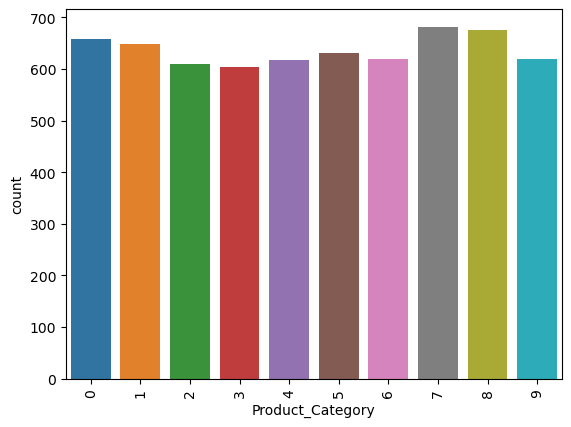

In [55]:
sns.countplot(x = 'Product_Category',data=data)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

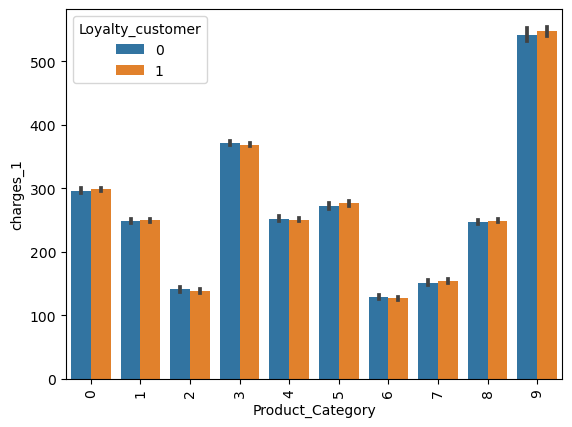

In [56]:
sns.barplot(x = 'Product_Category',y='charges_1',data=data,hue='Loyalty_customer')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

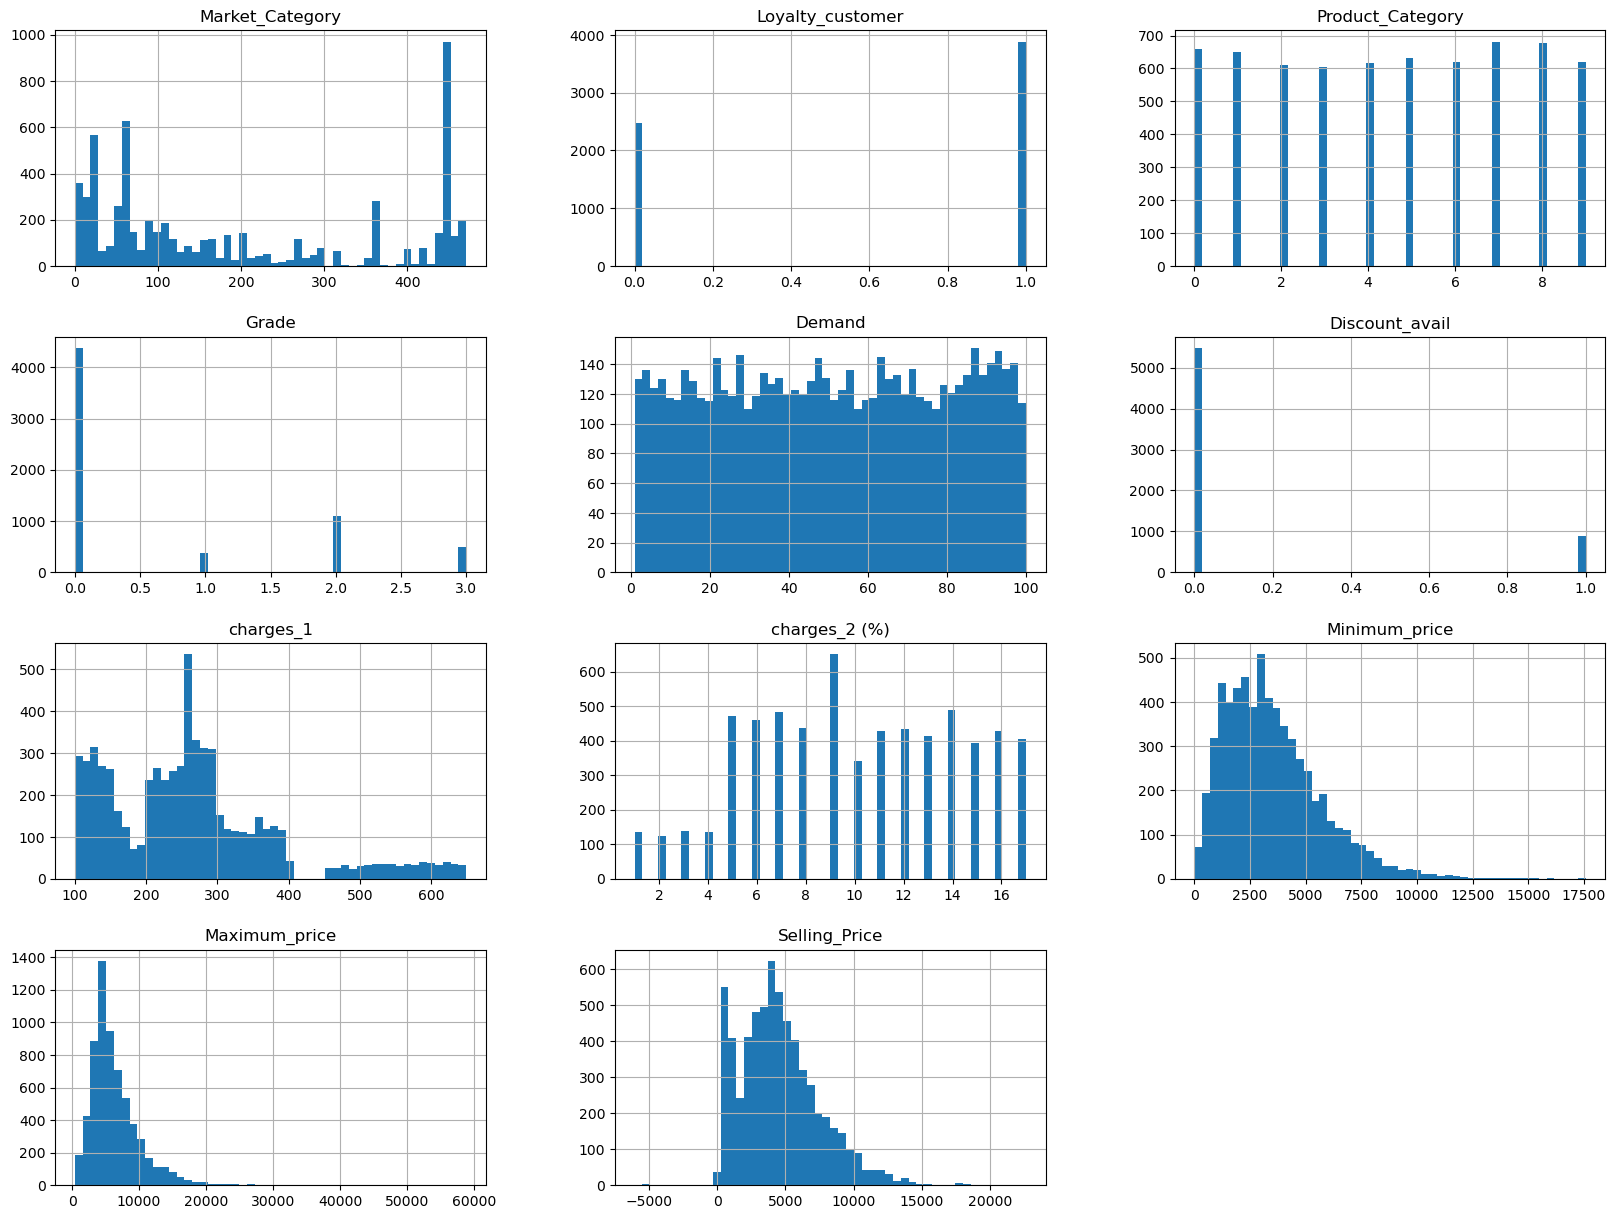

In [57]:
data.hist(bins=50,figsize=(20,15))
plt.show

<Figure size 1200x600 with 0 Axes>

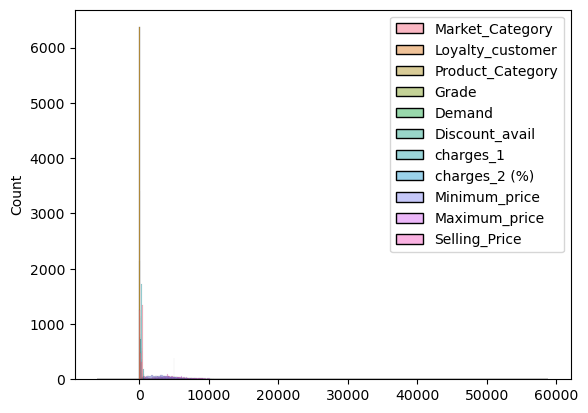

<Figure size 1200x600 with 0 Axes>

In [58]:
sns.histplot(data)
plt.figure(figsize=(12,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Market_Category'),
  Text(1, 0, 'Loyalty_customer'),
  Text(2, 0, 'Product_Category'),
  Text(3, 0, 'Grade'),
  Text(4, 0, 'Demand'),
  Text(5, 0, 'Discount_avail'),
  Text(6, 0, 'charges_1'),
  Text(7, 0, 'charges_2 (%)'),
  Text(8, 0, 'Minimum_price'),
  Text(9, 0, 'Maximum_price'),
  Text(10, 0, 'Selling_Price')])

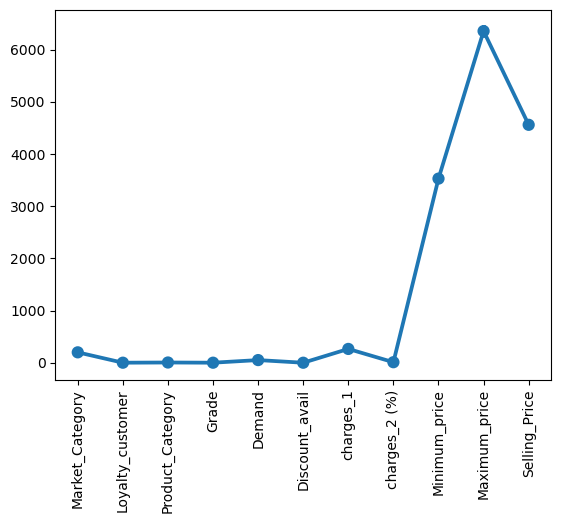

In [59]:
sns.pointplot(data)
plt.xticks(rotation=90)

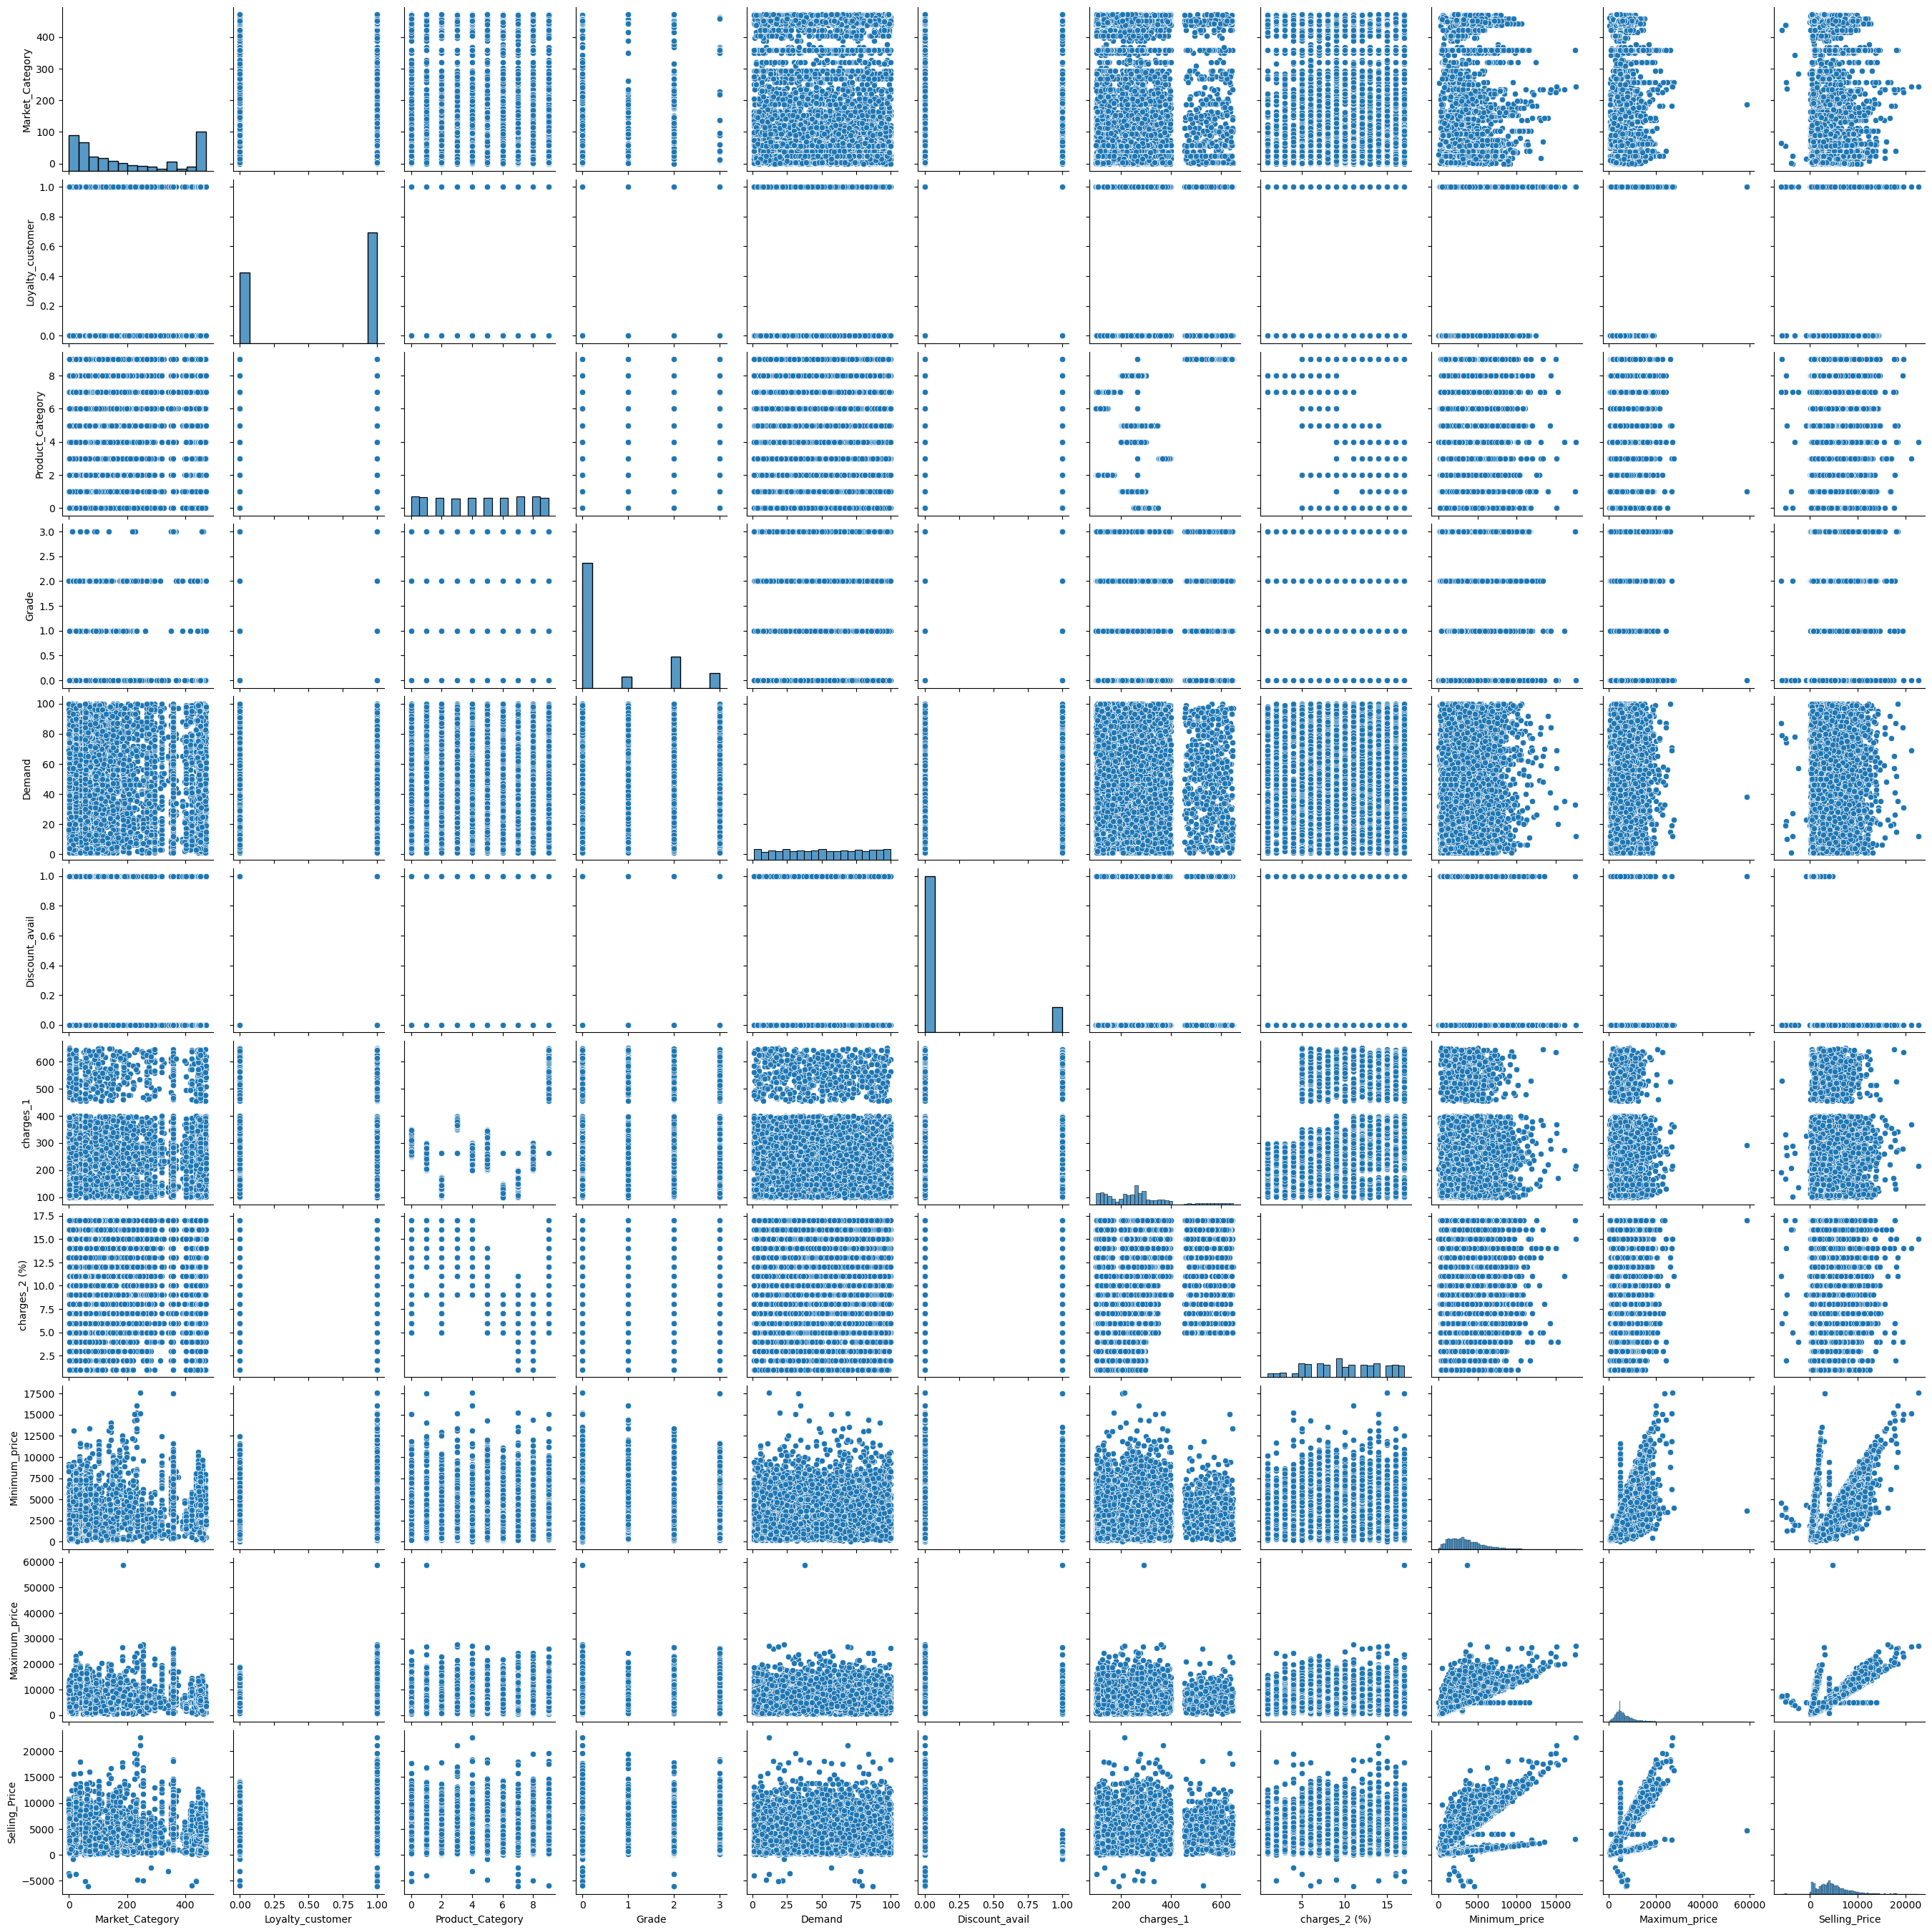

In [60]:
sns.pairplot(data)

<Axes: xlabel='Loyalty_customer', ylabel='Grade'>

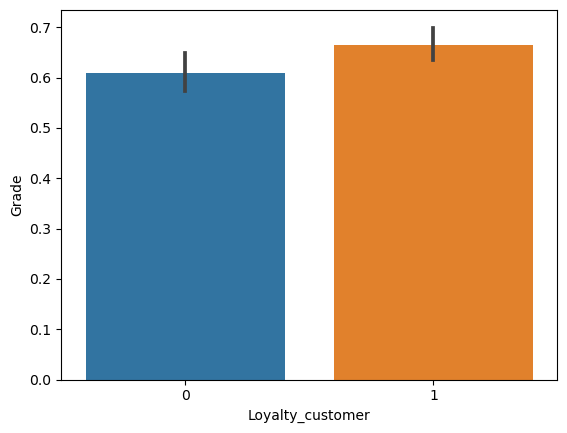

In [61]:
sns.barplot(x='Loyalty_customer',y='Grade',data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Market_Category'),
  Text(1, 0, 'Loyalty_customer'),
  Text(2, 0, 'Product_Category'),
  Text(3, 0, 'Grade'),
  Text(4, 0, 'Demand'),
  Text(5, 0, 'Discount_avail'),
  Text(6, 0, 'charges_1'),
  Text(7, 0, 'charges_2 (%)'),
  Text(8, 0, 'Minimum_price'),
  Text(9, 0, 'Maximum_price'),
  Text(10, 0, 'Selling_Price')])

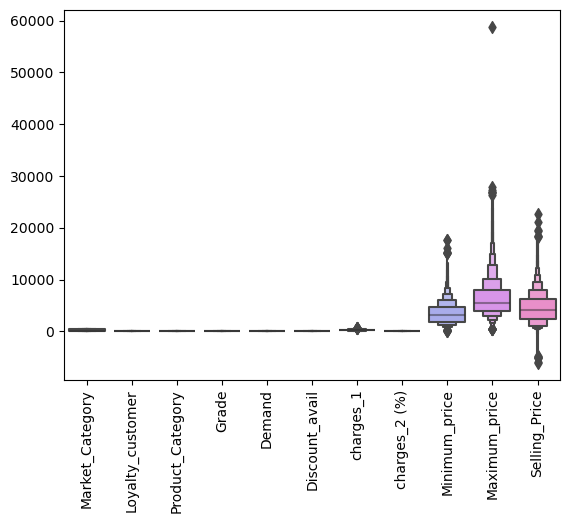

In [62]:
sns.boxenplot(data)
plt.xticks(rotation=90)

In [63]:
data.corr()['Selling_Price']

Market_Category     0.138007
Loyalty_customer    0.095342
Product_Category    0.014847
Grade               0.086263
Demand             -0.000590
Discount_avail     -0.508575
charges_1           0.052421
charges_2 (%)       0.008888
Minimum_price       0.695919
Maximum_price       0.745205
Selling_Price       1.000000
Name: Selling_Price, dtype: float64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Market_Category   6368 non-null   int64  
 1   Loyalty_customer  6368 non-null   int32  
 2   Product_Category  6368 non-null   int32  
 3   Grade             6368 non-null   int64  
 4   Demand            6368 non-null   int64  
 5   Discount_avail    6368 non-null   float64
 6   charges_1         6368 non-null   float64
 7   charges_2 (%)     6368 non-null   float64
 8   Minimum_price     6368 non-null   float64
 9   Maximum_price     6368 non-null   float64
 10  Selling_Price     6368 non-null   float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 547.2 KB


In [65]:
data['Discount_avail'] = data['Discount_avail'].astype("int")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Market_Category   6368 non-null   int64  
 1   Loyalty_customer  6368 non-null   int32  
 2   Product_Category  6368 non-null   int32  
 3   Grade             6368 non-null   int64  
 4   Demand            6368 non-null   int64  
 5   Discount_avail    6368 non-null   int32  
 6   charges_1         6368 non-null   float64
 7   charges_2 (%)     6368 non-null   float64
 8   Minimum_price     6368 non-null   float64
 9   Maximum_price     6368 non-null   float64
 10  Selling_Price     6368 non-null   float64
dtypes: float64(5), int32(3), int64(3)
memory usage: 522.4 KB


In [67]:
data.head()

,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,2,1,3,1,68,0,376.0,11.0,2983.0,4713.0,4185.947700
1,24,1,3,0,51,0,397.0,12.0,7495.0,10352.0,9271.490256
2,447,1,0,0,10,0,250.0,9.0,5752.0,7309.0,6785.701362
3,23,1,2,2,48,0,144.0,13.0,5090.0,20814.0,13028.917824
4,63,1,8,1,35,1,211.0,4.0,2430.0,9261.0,906.553935


In [68]:
data.corr()['Selling_Price']

Market_Category     0.138007
Loyalty_customer    0.095342
Product_Category    0.014847
Grade               0.086263
Demand             -0.000590
Discount_avail     -0.508575
charges_1           0.052421
charges_2 (%)       0.008888
Minimum_price       0.695919
Maximum_price       0.745205
Selling_Price       1.000000
Name: Selling_Price, dtype: float64

In [69]:
##  Only 2 columns are highly corellated for our output columns so that's why we select only those

In [70]:
x = data[['Minimum_price','Maximum_price']]

In [71]:
y = data['Selling_Price']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
##  We have to standrazize the data because data is very flactuate

In [74]:
sc = StandardScaler()

In [75]:
x_train = sc.fit_transform(x_train)

In [76]:
x_test = sc.transform(x_test)

In [77]:
model = Ridge()

In [78]:
model_train = model.fit(x_train,y_train)

In [79]:
pred = model_train.predict(x_test)

In [80]:
pred

array([8735.94738528, 1986.58476786, 5750.58417275, ..., 3782.59149417,
       5068.79983794, 6881.4860097 ])

In [81]:
model.coef_

array([1063.70755936, 1485.23865562])

In [82]:
print(model.intercept_)

4564.276370571535


In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_test,pred)

0.6140424524364427

In [85]:
print("accuracy of the model",r2_score(y_test,pred)*100)

accuracy of the model 61.404245243644276


In [86]:
# For a new Predction
model.predict(sc.transform([[500,1000]]))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([913.65406616])

In [87]:
model.predict(sc.transform([[2983.0,4713.0]]))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3630.05656743])